In [4]:
import numpy as np
import pandas as pd
import os
import mne
from mne import combine_evoked
from mne.io import read_raw_ctf
from mne.minimum_norm import apply_inverse

In [5]:
raw_file_sub1 = os.path.join(os.getcwd(),"derivatives/sub-0001/ses-0001/meg/sub-0001_ses-0001_task-mapping_ds_run-01_meg.ds")

In [6]:
raw = read_raw_ctf(raw_file_sub1)
n_times_run1 = raw.n_times
 

ds directory : /home/hp/Documents/AUDITORY_MEG/CTFDATASET/derivatives/sub-0001/ses-0001/meg/sub-0001_ses-0001_task-mapping_ds_run-01_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
      -2.66   70.21    0.00 mm <->   -2.66   70.21    0.00 mm (orig :  -57.68   47.83 -256.60 mm) diff =    0.000 mm
       2.66  -70.21    0.00 mm <->    2.66  -70.21    0.00 mm (orig :   48.49  -43.96 -263.70 mm) diff =    0.000 mm
      98.15    0.00    0.00 mm <->   98.15    0.00    0.00 mm (orig :   61.57   71.10 -238.45 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
Picked positions of 3 EEG channels from channel info
    3 EEG locations added to Polhemus data.
    Measurement info composed.
Finding samples for /home/hp/Documents/AUDITORY_MEG/CTFDATASET/derivatives/sub-0001/ses-0001/meg/sub-0001

In [7]:
raw.set_channel_types({"HEOG": "eog", "VEOG": "eog", "ECG": "ecg"})


Measurement date,"January 12, 2015 12:18:00 GMT"
Experimenter,JC
Participant,0001
Digitized points,6 points
Good channels,"2 Stimulus, 2 misc, 26 Reference Magnetometers, 273 Magnetometers, 1 ECG, 2 EOG"
Bad channels,None
EOG channels,"VEOG, HEOG"
ECG channels,ECG
Sampling frequency,2400.00 Hz
Highpass,0.00 Hz
Lowpass,1200.00 Hz


In [8]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['UADC001']


In [9]:
events.shape

(927, 3)

In [35]:
ecg_evoked = mne.preprocessing.create_ecg_epochs(raw,baseline=(None,0))


Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 24000 samples (10.000 s)

Number of ECG events detected : 858 (average pulse 62 / min.)
Not setting metadata
858 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
Loading data for 858 events and 2401 original time points ...
1 bad epochs dropped


No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


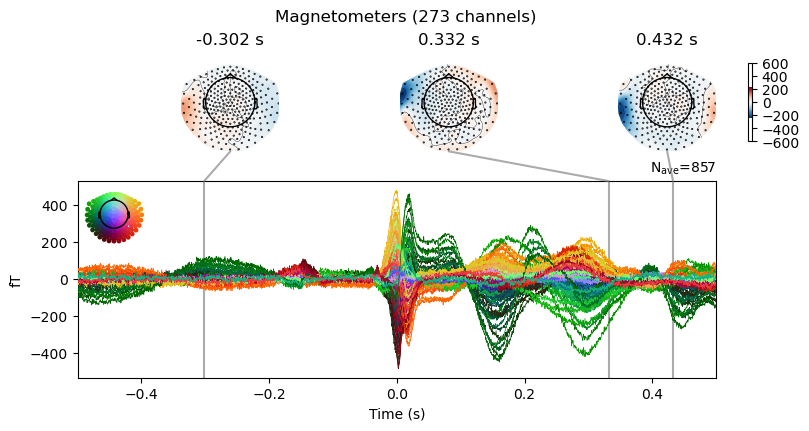

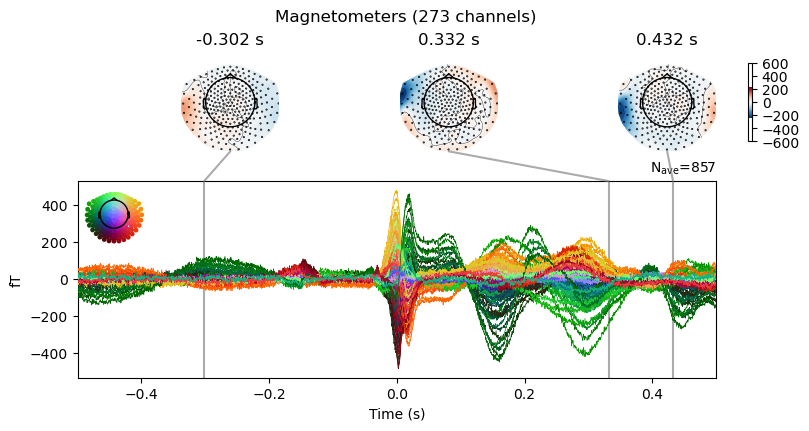

In [9]:
ecg_evoked.average().plot_joint()

In [10]:
eog_evoked = mne.preprocessing.create_eog_epochs(raw,baseline=(None,0))


Using EOG channels: VEOG, HEOG
EOG channel index for this subject is: [303 304]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 24000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 425 significant peaks
Number of EOG events detected: 425
Not setting metadata
425 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
Loading data for 425 events and 2401 original time points .

No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


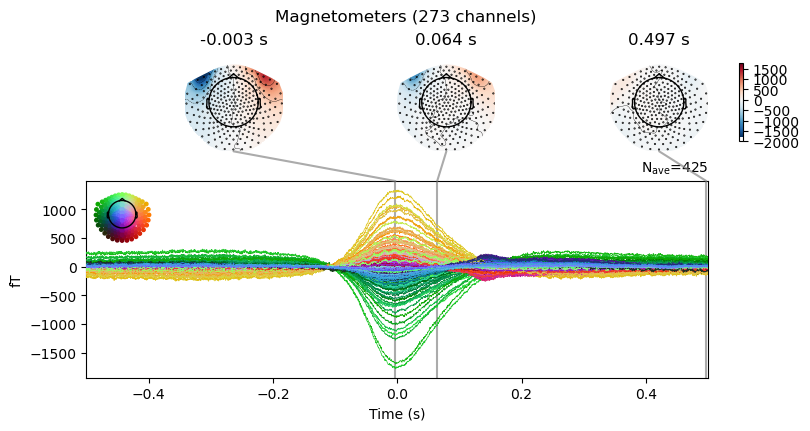

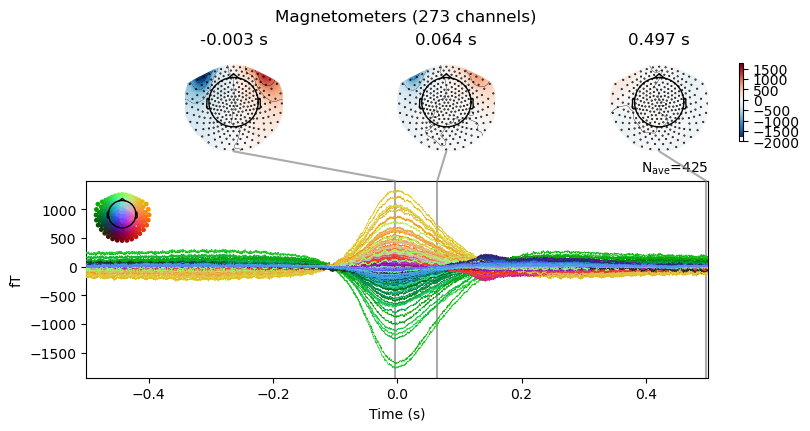

In [11]:
eog_evoked.average().plot_joint()

In [60]:
ecg_projs, ecg_events = mne.preprocessing.compute_proj_ecg(raw,ch_name="ECG",n_mag=3)

Reading 0 ... 1976362  =      0.000 ...   823.484 secs...


Including 0 SSP projectors from raw file
Running ECG SSP computation
Using channel ECG to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 24000 samples (10.000 s)

Number of ECG events detected : 859 (average pulse 62 / min.)
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 1.00
- Lower tr

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:   20.8s


: 

In [8]:
eog_projs, eog_events = mne.preprocessing.compute_proj_eog(raw,reject=None)

Reading 0 ... 1976362  =      0.000 ...   823.484 secs...


Including 0 SSP projectors from raw file
Running EOG SSP computation
Using EOG channels: VEOG, HEOG
EOG channel index for this subject is: [303 304]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 24000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 425 significant peaks
Number of EOG events detected: 425
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter para

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    6.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:   21.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:   41.2s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:  1.2min


Not setting metadata
425 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 425 events and 961 original time points ...
0 bad epochs dropped
No channels 'grad' found. Skipping.
Adding projection: axial--0.200-0.200-PCA-01 (exp var=96.3%)
Adding projection: axial--0.200-0.200-PCA-02 (exp var=3.4%)
No channels 'eeg' found. Skipping.
Done.


In [15]:
eog_events = mne.preprocessing.find_eog_events(raw)
ecg_events = mne.preprocessing.find_ecg_events(raw)

Using EOG channels: VEOG, HEOG
EOG channel index for this subject is: [303 304]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 24000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 425 significant peaks
Number of EOG events detected: 425
Using channel ECG to identify heart beats.
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-ca

Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 24000 samples (10.000 s)

Number of ECG events detected : 858 (average pulse 62 / min.)
Not setting metadata
858 matching events found
No baseline correction applied
Loading data for 858 events and 2401 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info beca

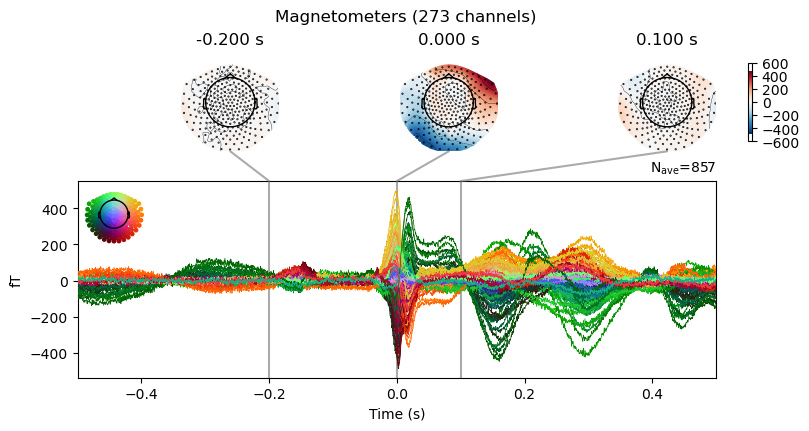

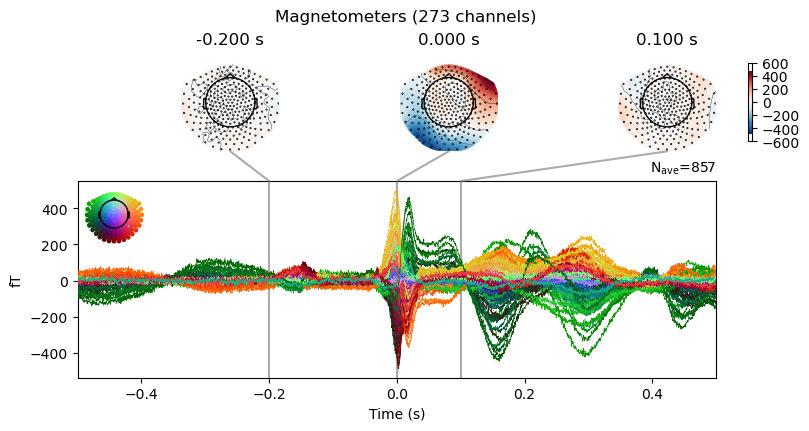

In [12]:
ecg_evoked = mne.preprocessing.create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))


No projector specified for this dataset. Please consider the method self.add_proj.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


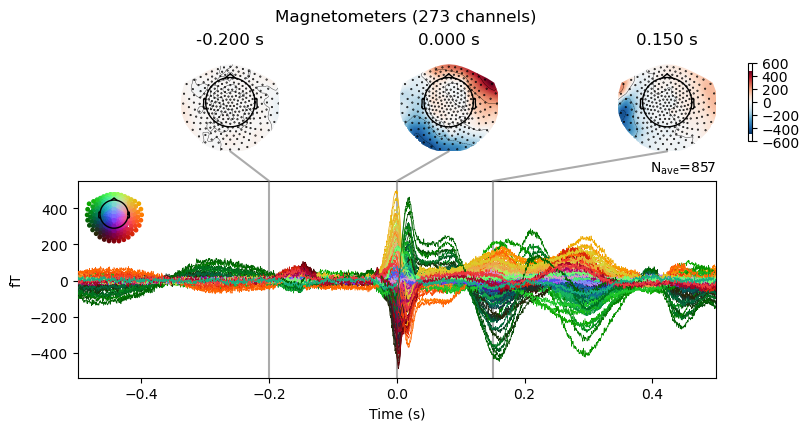

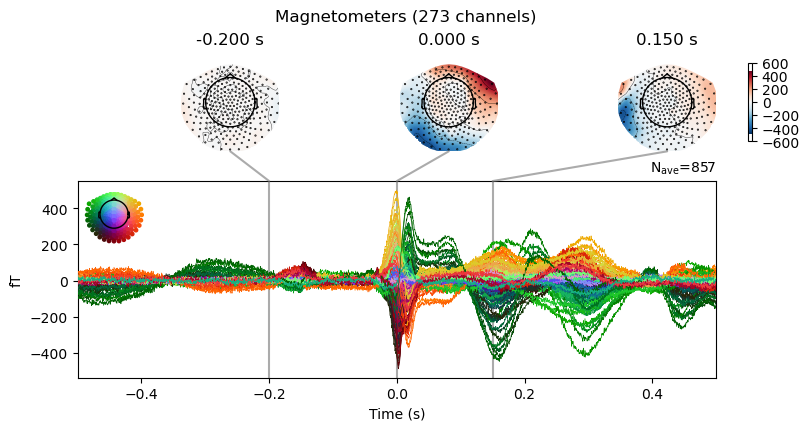

In [13]:
ecg_evoked.plot_joint(times=[-0.2,0,0.15])

In [5]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)


Using channel ECG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 24000 samples (10.000 s)

Number of ECG events detected : 858 (average pulse 62 / min.)
Not setting metadata
858 matching events found
No baseline correction applied
Loading data for 858 events and 2401 original time points ...
1 bad epochs dropped


In [6]:

ecg_epochs.plot_image(combine="mean")

Not setting metadata
857 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
857 matching events found


: 

Removing 5 compensators from info because not all compensation channels were picked.
Removing 5 compensators from info because not all compensation channels were picked.


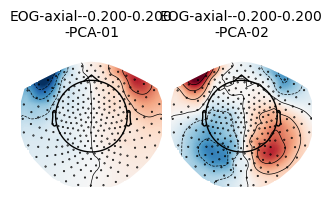

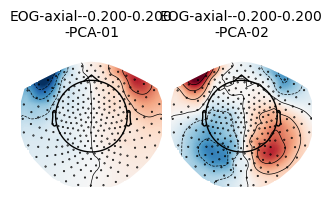

In [17]:
mne.viz.plot_projs_topomap(eog_projs,raw.info)

In [18]:
raw.info["projs"]

[]

In [19]:
raw.add_proj(ecg_projs,remove_existing=True)

3 projection items deactivated


Measurement date,"January 12, 2015 12:18:00 GMT"
Experimenter,JC
Participant,0001
Digitized points,6 points
Good channels,"2 Stimulus, 2 misc, 26 Reference Magnetometers, 273 Magnetometers, 1 ECG, 2 EOG"
Bad channels,None
EOG channels,"VEOG, HEOG"
ECG channels,ECG
Sampling frequency,2400.00 Hz
Highpass,0.00 Hz
Lowpass,1200.00 Hz


In [58]:
raw.add_proj(eog_projs,remove_existing=False)

NameError: name 'eog_projs' is not defined

In [59]:
raw.info["projs"]

[]

In [22]:
epochs = mne.Epochs(raw,events,tmin=-0.5,tmax=0.5,baseline=(-0.5,0),picks="mag")

Not setting metadata
927 matching events found
Removing 5 compensators from info because not all compensation channels were picked.
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 5)
5 projection items activated


In [23]:
epochs.info

Measurement date,"January 12, 2015 12:18:00 GMT"
Experimenter,JC
Participant,0001
Digitized points,6 points
Good channels,273 Magnetometers
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2400.00 Hz
Highpass,0.00 Hz
Lowpass,1200.00 Hz


In [55]:
evoked =epochs.average(picks="mag").filter(l_freq=None,h_freq=40.0)

NameError: name 'epochs' is not defined

In [56]:
evoked.plot()

NameError: name 'evoked' is not defined

In [11]:
subjects_dir = "/home/hp/Documents/AUDITORY_MEG/CTFDATASET"

In [12]:
mne.gui.coregistration(subject="sub_0001", subjects_dir=subjects_dir)

Using pyvistaqt 3d backend.

    Triangle neighbors and vertex normals...
Using low resolution head model in /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/bem/outer_skin.surf
    Triangle neighbors and vertex normals...
Estimating fiducials from fsaverage.
    Triangle neighbors and vertex normals...
Using low resolution head model in /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/bem/outer_skin.surf
    Triangle neighbors and vertex normals...
Estimating fiducials from fsaverage.
Estimating fiducials from fsaverage.
Placing MRI fiducials - LPA
Using outer_skin.surf for head surface.
Placing MRI fiducials - LPA


In [108]:
coreg = mne.coreg.Coregistration(info, subject, subjects_dir, fiducials=fiducials)
fig = mne.viz.plot_alignment(info, trans=coreg.trans, **plot_kwargs)

Using high resolution head model in /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/bem/sub_0001-head-dense.fif
    Triangle neighbors and vertex normals...


Using sub_0001-head-dense.fif for head surface.
    1 BEM surfaces found
    Reading a surface...
[done]
    1 BEM surfaces read
Removing 5 compensators from info because not all compensation channels were picked.
Channel types::	mag: 273


In [43]:
brain.add_annotation("aparc.a2009s", borders=False)


In [ ]:
renderer = mne.viz.backends.renderer.create_3d_figure()

In [46]:
plot_kwargs = dict(
    subject=subject,
    subjects_dir=subjects_dir,
    surfaces="head-dense",
    dig=True,
    eeg=[],
    meg="sensors",
    show_axes=True,
    coord_frame="meg",
)

In [47]:
view_kwargs = dict(azimuth=45, elevation=90, distance=0.6, focalpoint=(0.0, 0.0, 0.0))


In [25]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [26]:
raw.info["hpi_results"]

[{'dig_points': [{'kind': 1 (FIFFV_POINT_CARDINAL),
    'ident': 2 (FIFFV_POINT_NASION),
    'r': array([-0.0067388 ,  0.09381829, -0.048447  ]),
    'coord_frame': 0 (FIFFV_COORD_UNKNOWN)},
   {'kind': 1 (FIFFV_POINT_CARDINAL),
    'ident': 1 (FIFFV_POINT_LPA),
    'r': array([-0.07460684, -0.00696684, -0.066602  ]),
    'coord_frame': 0 (FIFFV_COORD_UNKNOWN)},
   {'kind': 1 (FIFFV_POINT_CARDINAL),
    'ident': 3 (FIFFV_POINT_RPA),
    'r': array([ 0.06536834,  0.0032063 , -0.073703  ]),
    'coord_frame': 0 (FIFFV_COORD_UNKNOWN)}],
  'coord_trans': <Transform | CTF/4D/KIT head->head>
  [[ 0.03789973 -0.99928155 -0.         -0.00371994]
   [ 0.99928155  0.03789973  0.         -0.        ]
   [ 0.          0.          1.          0.        ]
   [ 0.          0.          0.          1.        ]]}]

Using surface: /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/bem/inner_skull.surf
Using surface: /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/bem/outer_skull.surf
Using surface: /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/bem/outer_skin.surf


/home/hp/miniconda3/envs/mne/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


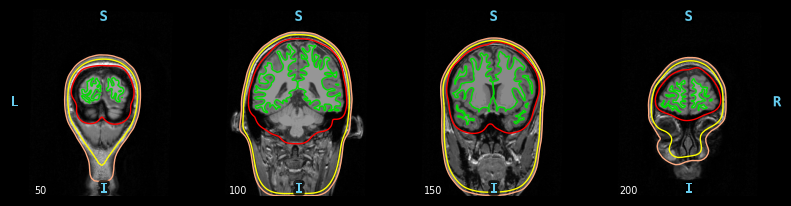

In [98]:
plot_bem_kwargs = dict(
    subject=subject,
    subjects_dir=subjects_dir,
    brain_surfaces="white",
    orientation="coronal",
    slices=[50, 100, 150, 200],
)

mne.viz.plot_bem(**plot_bem_kwargs)

In [101]:
raw.info["dev_head_t"]["trans"]

array([[ 0.99609514,  0.07239442, -0.05053232, -0.00252758],
       [-0.05938896,  0.97295793,  0.223217  ,  0.01721432],
       [ 0.06532549, -0.2193443 ,  0.97345809,  0.06817985],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [21]:
mne.gui.coregistration(subject="sub_0001", subjects_dir=subjects_dir,head_high_res=True)

    Triangle neighbors and vertex normals...
Using low resolution head model in /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/bem/outer_skin.surf
    Triangle neighbors and vertex normals...
Estimating fiducials from fsaverage.
    Triangle neighbors and vertex normals...
Using low resolution head model in /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/bem/outer_skin.surf
    Triangle neighbors and vertex normals...
Estimating fiducials from fsaverage.
Estimating fiducials from fsaverage.
Placing MRI fiducials - LPA
Using outer_skin.surf for head surface.
Placing MRI fiducials - LPA


In [16]:
subject="sub_0001"

In [27]:
coreg = mne.coreg.Coregistration(raw.info, subject, subjects_dir, fiducials=fiducials)
plot_kwargs = dict(
    subject=subject,
    subjects_dir=subjects_dir,
    surfaces="head",
    dig=True,
    eeg=[],
    meg="sensors",
    show_axes=True,
    coord_frame="meg",
)
fig = mne.viz.plot_alignment(raw.info, trans=coreg.trans, **plot_kwargs)


    Triangle neighbors and vertex normals...
Using low resolution head model in /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/bem/outer_skin.surf
    Triangle neighbors and vertex normals...
Using outer_skin.surf for head surface.
Removing 5 compensators from info because not all compensation channels were picked.
Channel types::	mag: 273


In [36]:
chpi_locs = mne.chpi.extract_chpi_locs_ctf(raw)

mne.chpi.compute_head_pos(raw.info, chpi_locs)

RuntimeError: Could not find all 9 cHPI channels

In [124]:
coreg.fit_fiducials(verbose=True)
fig = mne.viz.plot_alignment(info, trans=coreg.trans, **plot_kwargs)

Aligning using fiducials
Start median distance:  10.25 mm
End   median distance:  10.25 mm
Using outer_skin.surf for head surface.
Removing 5 compensators from info because not all compensation channels were picked.
Channel types::	mag: 273


In [125]:
coreg.fit_icp(n_iterations=20, verbose=True)
fig = mne.viz.plot_alignment(info, trans=coreg.trans, **plot_kwargs)

Aligning using ICP
Start     median distance:  10.25 mm
  ICP  1  median distance:   8.01 mm
  ICP  2  median distance:   7.59 mm
  ICP  3  median distance:   7.40 mm
  ICP  4  median distance:   7.11 mm
  ICP  5  median distance:   6.91 mm
  ICP  6  median distance:   6.73 mm
  ICP  7  median distance:   6.76 mm
  ICP  8  median distance:   6.38 mm
  ICP  9  median distance:   6.31 mm
  ICP 10  median distance:   6.27 mm
  ICP 11  median distance:   6.12 mm
  ICP 12  median distance:   6.02 mm
  ICP 13  median distance:   5.92 mm
  ICP 14  median distance:   5.74 mm
  ICP 15  median distance:   5.97 mm
  ICP 16  median distance:   5.97 mm
End       median distance:   5.97 mm
Using outer_skin.surf for head surface.
Removing 5 compensators from info because not all compensation channels were picked.
Channel types::	mag: 273


In [126]:
coreg.omit_head_shape_points(distance=5.0 / 1000)  # distance is in meters

Coregistration: Excluding 0 head shape points with distance >= 0.005 m.


In [127]:
coreg.fit_icp(n_iterations=20, nasion_weight=10.0, verbose=True)
fig = mne.viz.plot_alignment(info, trans=coreg.trans, **plot_kwargs)
mne.viz.set_3d_view(fig, **view_kwargs)

dists = coreg.compute_dig_mri_distances() * 1e3  # in mm
print(
    f"Distance between HSP and MRI (mean/min/max):\n{np.mean(dists):.2f} mm "
    f"/ {np.min(dists):.2f} mm / {np.max(dists):.2f} mm"
)

Aligning using ICP
Start     median distance:   5.97 mm
  ICP  1  median distance:   5.97 mm
End       median distance:   5.97 mm
Using outer_skin.surf for head surface.
Removing 5 compensators from info because not all compensation channels were picked.
Channel types::	mag: 273
Distance between HSP and MRI (mean/min/max):
6.68 mm / 2.47 mm / 12.75 mm


In [128]:
mne.write_trans('sub_0001/sub_0001-trans.fif', coreg.trans)


In [130]:
src = mne.setup_source_space(
    subject, spacing="ico5", add_dist=True, subjects_dir=subjects_dir
)
print(src)

Setting up the source space with the following parameters:

SUBJECTS_DIR = /home/hp/Documents/AUDITORY_MEG/CTFDATASET
Subject      = sub_0001
Surface      = white
Icosahedron subdivision grade 5

>>> 1. Creating the source space...

Doing the icosahedral vertex picking...
Loading /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/surf/lh.white...
Mapping lh sub_0001 -> ico (5) ...
    Triangle neighbors and vertex normals...
Loading geometry from /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 10242/143203 selected to source space (ico = 5)

Loading /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/surf/rh.white...
Mapping rh sub_0001 -> ico (5) ...
    Triangle neighbors and vertex normals...
Loading geometry from /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub_0001/surf/rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 10242/142359 selected to source 

In [131]:
src.save("sub_001-ico5-src.fif")

    Write a source space...
    [done]
    Write a source space...
    [done]
    2 source spaces written


In [38]:
src =mne.read_source_spaces("sub_001-ico5-src.fif")

    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read


In [39]:
src.plot(subjects_dir=subjects_dir)

In [40]:
mne.viz.plot_alignment(
    raw.info,
    src=src,
    eeg=["original", "projected"],
    trans=coreg.trans,
    show_axes=True,
    dig=True,
    subject=subject,
    subjects_dir=subjects_dir
)

Using outer_skin.surf for head surface.
Getting helmet for system CTF_275
Removing 5 compensators from info because not all compensation channels were picked.
Channel types::	mag: 273


In [41]:
model=mne.make_bem_model ( subject, ico=4, conductivity=(0.3,), subjects_dir=subjects_dir, verbose=True)
#had problem with inner skull not fully inside outer skull

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
inner skull CM is  -0.16  -8.00  15.65 mm
Surfaces passed the basic topology checks.
Complete.



In [42]:
bem = mne.make_bem_solution(model)

Homogeneous model surface loaded.
Computing the linear collocation solution...
    Matrix coefficients...
        inner skull (2562) -> inner skull (2562) ...
    Inverting the coefficient matrix...
Solution ready.
BEM geometry computations complete.


In [43]:
fwd = mne.make_forward_solution(
    raw.info, trans=coreg.trans, src=src, bem=bem, eeg=True, mindist=5.0
)
print(fwd)

Source space          : <SourceSpaces: [<surface (lh), n_vertices=143203, n_used=10242>, <surface (rh), n_vertices=142359, n_used=10242>] MRI (surface RAS) coords, subject 'sub_0001', ~27.1 MB>
MRI -> head transform : instance of Transform
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 20484 active source locations

Coordinate transformation: MRI (surface RAS) -> head
    1.000000 0.000000 0.000000       0.00 mm
    0.000000 1.000000 0.000000       0.00 mm
    0.000000 0.000000 1.000000       0.00 mm
    0.000000 0.000000 0.000000       1.00

Read 299 MEG channels from info
Read 26 MEG compensation channels from info
5 compensation data sets in info
Setting up compensation data...
    Desired compensation data (3) found.
    All compensation channels found.
    Preselector created.
    Compensation data matrix created.
    Po

In [46]:
fwd.save("sub_001-ico5-fwd.fif")

    Write a source space...
    [done]
    Write a source space...
    [done]
    2 source spaces written


In [47]:
raw_empty_room = "/home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub-emptyroom/ses-20150112/meg/sub-emptyroom_ses-20150112_task-noise_run-01_meg.ds"

In [48]:
raw_empty = read_raw_ctf(raw_empty_room)


ds directory : /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub-emptyroom/ses-20150112/meg/sub-emptyroom_ses-20150112_task-noise_run-01_meg.ds
    res4 data read.
    hc data read.
    Separate EEG position data file not present.
    Quaternion matching (desired vs. transformed):
       0.00   80.00    0.00 mm <->    0.00   80.00    0.00 mm (orig :  -56.57   56.57 -270.00 mm) diff =    0.000 mm
       0.00  -80.00    0.00 mm <->    0.00  -80.00    0.00 mm (orig :   56.57  -56.57 -270.00 mm) diff =    0.000 mm
      80.00    0.00    0.00 mm <->   80.00   -0.00    0.00 mm (orig :   56.57   56.57 -270.00 mm) diff =    0.000 mm
    Coordinate transformations established.
    Polhemus data for 3 HPI coils added
    Device coordinate locations for 3 HPI coils added
    Measurement info composed.
Finding samples for /home/hp/Documents/AUDITORY_MEG/CTFDATASET/sub-emptyroom/ses-20150112/meg/sub-emptyroom_ses-20150112_task-noise_run-01_meg.ds/sub-emptyroom_ses-20150112_task-noise_run-01_meg.meg4: 

In [49]:
raw_empty.info

Measurement date,"January 12, 2015 10:50:00 GMT"
Experimenter,JC
Participant,emptyroom
Digitized points,3 points
Good channels,"1 misc, 26 Reference Magnetometers, 273 Magnetometers"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,12000.00 Hz
Highpass,0.00 Hz
Lowpass,6000.00 Hz


In [51]:
noise_cov = mne.compute_raw_covariance(raw_empty, tmin=0, tmax=None)


Using up to 600 segments
Number of samples used : 1440000
[done]


In [53]:
from mne.minimum_norm import apply_inverse, make_inverse_operator


In [54]:
snr = 3.0  # use smaller SNR for raw data
inv_method = "eLORETA"  # sLORETA, MNE, dSPM
parc = "aparc"  # the parcellation to use, e.g., 'aparc' 'aparc.a2009s'
loose = dict(surface=0.2, volume=1.0)

lambda2 = 1.0 / snr**2

inverse_operator = make_inverse_operator(
    evoked.info, fwd, noise_cov, depth=None, loose=loose, verbose=True
)
del fwd

stc = apply_inverse(evoked, inverse_operator, lambda2, inv_method, pick_ori=None)
src = inverse_operator["src"]

NameError: name 'evoked' is not defined